## Reference
Ising formulations of many NP problems  
Andrew Lucas  
https://arxiv.org/abs/1302.5843

# 1.Maxcut
The maxcut problem is to see if you can cross as many edges as possible in a single stroke.

## Ising Hamiltonian
The hamiltonian of maxcut is

$$H = -\sum_{i,j}\frac{1}{2}(1-z_iz_j)$$

z takes a value of 1 or -1, corresponding to the value of each vertex.

## Example
Let's solve a graph problem with five points and six edges. First, let's draw the graph.

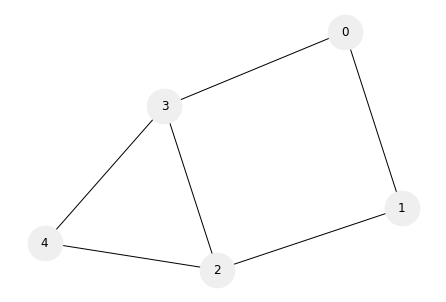

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(2,3),(2,4),(3,4)])
nx.draw(G, **options, node_color='#efefef')

Substituting the values for all vertex relationships, we get

$$H = \frac{1}{2} \left\{ (z_0z_1-1) + (z_0z_3-1) + (z_1z_2-1) + (z_2z_3-1) + (z_2z_4-1) + (z_3z_4-1)\right\}$$

## Solving with a simulator
Here, we will use the variational solver function of blueqat to solve the problem on a simulator.

(((0, 1, 0, 1, 0), 0.1100090486339389), ((1, 0, 1, 0, 1), 0.1100090486339389), ((1, 0, 1, 0, 0), 0.11000904863393887), ((0, 1, 0, 1, 1), 0.11000904863393887), ((0, 0, 1, 1, 0), 0.05909099422983758), ((1, 1, 0, 0, 1), 0.05909099422983758), ((0, 1, 1, 1, 0), 0.056161700772601714), ((1, 0, 0, 0, 1), 0.056161700772601714), ((1, 0, 1, 1, 0), 0.05616170077260168), ((0, 1, 0, 0, 1), 0.05616170077260168), ((1, 0, 0, 1, 0), 0.022392634271477814), ((0, 1, 1, 0, 1), 0.022392634271477814))


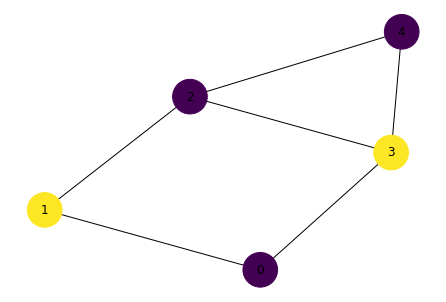

In [4]:
from blueqat import vqe
from blueqat.pauli import Z

hamiltonian = ((Z[0]*Z[1]-1) + (Z[0]*Z[3]-1) + (Z[1]*Z[2]-1) + (Z[2]*Z[3]-1) + (Z[2]*Z[4]-1) + (Z[3]*Z[4]-1))/2
step = 2

result = vqe.Vqe(vqe.QaoaAnsatz(hamiltonian, step)).run()
print(result.most_common(12))

nx.draw(G, node_color=result.most_common()[0][0],**options)

The edges between the vertices of different colors will be cut.

# 2.Number Partitioning Problem

Number Partitioning Problem is a problem to make two groups that sum of the each groups are the same.

## Ising hamiltonian

$i$th of N natural number we put as  $n_i$. And if this number belongs to any groups we show this using 
$z_i$. If $n_i$ belongs to group A, it is $z_i=1$. And if it belongs to group B it is $z_i=-1$.

And then we create a hamiltonian of $H$ that take the minimum value when the sum of each groups are the same.

$$
H = (\sum n_i*z_i)^2
$$

It will be $H=0$ when the sum of two groups are the same and takes $H>0$ if these are different.

## Example
Let's try solve a simple example. Now we have a list of natural number

[3,6,5,6,5,2,6,8,5,8]

and we make two groups. The hamiltonian is very simple

$$
H = (3*z_0+6*z_1+5*z_2+6*z_3+5*z_4+2*z_5+6*z_6+8*z_7+5*z_8+8*z_9)^2
$$

In [14]:
#sum 38
num = [3,6,5,6,5,2,6,5]

from blueqat import vqe
from blueqat.pauli import Z

hamiltonian = (num[0]*Z(0)+num[1]*Z(1)+num[2]*Z(2)+num[3]*Z(3)+num[4]*Z(4)+num[5]*Z(5)+num[6]*Z(6)+num[7]*Z(7))**2
step = 2

result = vqe.Vqe(vqe.QaoaAnsatz(hamiltonian.simplify(), step)).run()

b = sum([x*y for (x,y) in zip(num, list(result.most_common(1)[0][0]))])

#answer 19
print(b)

result.most_common(12)

19


(((0, 0, 1, 1, 0, 1, 1, 0), 0.009283941632848881),
 ((0, 1, 0, 0, 1, 1, 1, 0), 0.009283941632848881),
 ((1, 0, 1, 1, 0, 0, 0, 1), 0.009283941632848881),
 ((1, 1, 0, 0, 1, 0, 0, 1), 0.009283941632848881),
 ((0, 0, 0, 1, 1, 1, 1, 0), 0.00928394163284888),
 ((1, 1, 1, 0, 0, 0, 0, 1), 0.00928394163284888),
 ((1, 1, 1, 0, 1, 0, 0, 0), 0.009283941632848878),
 ((0, 0, 0, 1, 0, 1, 1, 1), 0.009283941632848878),
 ((0, 1, 0, 1, 1, 1, 0, 0), 0.009283941632848876),
 ((1, 0, 1, 0, 1, 0, 1, 0), 0.009283941632848876),
 ((0, 1, 0, 1, 0, 1, 0, 1), 0.009283941632848876),
 ((1, 0, 1, 0, 0, 0, 1, 1), 0.009283941632848876))

Finally we got two groups the sum is each 19.

# 3.Binary Integer Linear Programming
With the constraint $Sx=b$ for vector $x$. Finding vector $x$ which maximize $c⋅x$ is so called binary integer linear programming

## QUBO
QUBO formulation is like below. We have constraint as $H_A$ and cost function as $H_B$.

$$
H = H_A + H_B = \sum_{j=1}^m[b_j - \sum_{i=1}^NS_{ji}q_i]^2 - \sum_{i=1}^Nc_iq_i
$$

## Example

When x satisfy,

$$
\begin{bmatrix}
3 & 2 & 1 \\
5 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
x_0\\x_1\\x_2
\end{bmatrix}
=
\begin{bmatrix}
3\\5
\end{bmatrix}
$$

find x maximize

$$
\begin{bmatrix}
1&2&1
\end{bmatrix}
\begin{bmatrix}
x_0\\x_1\\x_2
\end{bmatrix}
$$

In [1]:
from blueqat import vqe
from blueqat.pauli import qubo_bit as q

hamiltonian = (3*q(0)+2*q(1)+q(2)-3)**2 + (5*q(0)+2*q(1)+3*q(2)-5)**2 - (q(0)+2*q(1)+q(2))
hamiltonian = hamiltonian.simplify()
step = 4

result = vqe.Vqe(vqe.QaoaAnsatz(hamiltonian, step)).run()
print(result.most_common(12))

(((0, 1, 1), 0.7254611393924748), ((1, 0, 0), 0.15504530265234998), ((0, 1, 0), 0.05112231283464814), ((1, 1, 0), 0.03773126903788143), ((1, 0, 1), 0.01981565448507648), ((0, 0, 1), 0.005897138893776281), ((1, 1, 1), 0.003086959595179079), ((0, 0, 0), 0.001840223108613939))


Now we got 011 as the result.

## Solve using IonQ and Rigetti
To solve problems on a quantum computer, you need to register for an account on blueqat and get credit for the actual machine. Please obtain an API key from the setting screen and run it.

To solve a problem with a quantum computer, you need to wait for the computer to run. In some cases, the waiting time can be several hours.

In [2]:
from bqcloud import load_api
from blueqat import Circuit
from bqcloud import Device

api = load_api()

In [5]:
# Circuit, Device, Number of shots, Group name(Optional) for IonQ
task_ionq = api.execute(result.circuit, Device.IonQDevice, 10)

# Circuit, Device, Number of shots, Group name(Optional) for Rigetti
task_rigetti = api.execute(result.circuit, Device.Aspen11, 10)